В якості домашнього завдання вам пропонується створити рекурентну нейронну мережу за допомогою механізмів Keras, яка буде класифікувати рецензії із датасету imdb.

На відміну від прикладу в модулі 9 ми використаємо рекурентну нейронну мережу. Поекспериментуйте з будовою мережі - RNN, LSTM, двостороння та глибока.

Порівняйте результати та зробіть висновки.

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf

from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense, Embedding, SimpleRNN
from keras import optimizers
from keras import losses
from keras import metrics
from keras.callbacks import EarlyStopping

In [ ]:
from keras.datasets import imdb

In [ ]:
max_features = 10000  # кількість слів, що розглядаються як особливості
maxlen = 500  # обмеження кількості слів в тексті
batch_size = 64

In [ ]:
(train_data, train_labels), (test_data, test_labels) = imdb.load_data(num_words=max_features)

In [ ]:
train_data.shape, len(train_data[0]), len(train_data[4]), type(train_data[0])

((25000,), 218, 147, list)

In [ ]:
train_labels.shape

(25000,)

In [ ]:
from keras.utils.data_utils import pad_sequences
input_train=pad_sequences(train_data, maxlen=maxlen)
input_test=pad_sequences(test_data, maxlen=maxlen)

In [ ]:
#y_train=tf.one_hot(train_labels, depth=2)
#y_test=tf.one_hot(train_labels, depth=2)

In [ ]:
model=Sequential([
    Embedding(input_dim=max_features, output_dim=32, input_length=maxlen),
    SimpleRNN(32, activation='tanh'),
    Dense(1, activation='sigmoid')
])

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 500, 32)           320000    
                                                                 
 simple_rnn (SimpleRNN)      (None, 32)                2080      
                                                                 
 dense (Dense)               (None, 1)                 33        
                                                                 
Total params: 322,113
Trainable params: 322,113
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model.compile(
    optimizer=optimizers.Adam(learning_rate=0.0001),
    loss=losses.BinaryCrossentropy(),
    metrics=['binary_accuracy'],
)

In [ ]:
callback_early_stopping = EarlyStopping(
    monitor="val_binary_accuracy",
    min_delta=0.00001,
    patience=5,
)

In [ ]:
history = model.fit(
    input_train,
    train_labels,
    epochs=20,
    batch_size=batch_size,
    callbacks=[callback_early_stopping],
    validation_data=(input_test, test_labels))
# Запускаємо навчання моделі на тренувальних даних для 5 епох з розміром пакету 128 та розбиттям на тренувальну та валідаційну підмножини

Epoch 1/20
391/391 [==============================] - 82s 206ms/step - loss: 0.6945 - binary_accuracy: 0.5100 - val_loss: 0.6901 - val_binary_accuracy: 0.5308
Epoch 2/20
391/391 [==============================] - 79s 203ms/step - loss: 0.6691 - binary_accuracy: 0.6043 - val_loss: 0.6080 - val_binary_accuracy: 0.6657
Epoch 3/20
391/391 [==============================] - 80s 204ms/step - loss: 0.4870 - binary_accuracy: 0.7788 - val_loss: 0.4365 - val_binary_accuracy: 0.8118
Epoch 4/20
391/391 [==============================] - 85s 219ms/step - loss: 0.3803 - binary_accuracy: 0.8424 - val_loss: 0.4070 - val_binary_accuracy: 0.8171
Epoch 5/20
391/391 [==============================] - 73s 186ms/step - loss: 0.3107 - binary_accuracy: 0.8806 - val_loss: 0.3612 - val_binary_accuracy: 0.8470
Epoch 6/20
391/391 [==============================] - 75s 191ms/step - loss: 0.2556 - binary_accuracy: 0.9086 - val_loss: 0.3456 - val_binary_accuracy: 0.8554
Epoch 7/20
391/391 [==========================

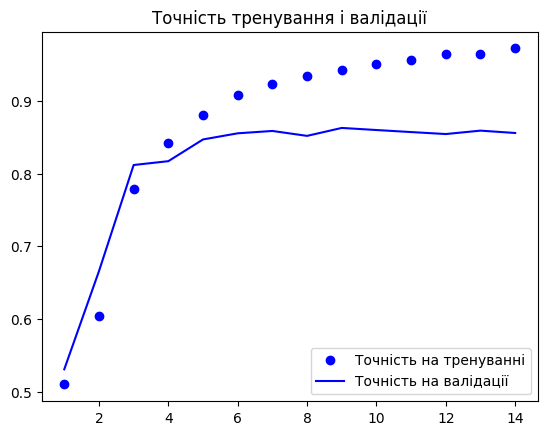

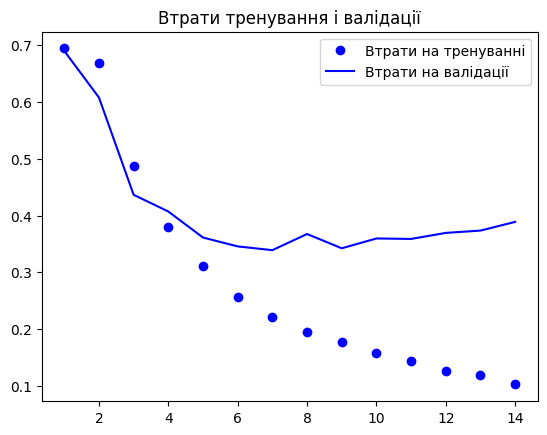

In [ ]:
acc = history.history['binary_accuracy']
val_acc = history.history['val_binary_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'bo', label='Точність на тренуванні')  # Графік точності на тренувальних данних
plt.plot(epochs, val_acc, 'b', label='Точність на валідації')  # Графік точності на валідаційних данних
plt.title('Точність тренування і валідації')  # Заголовок графіку
plt.legend()  # Показати легенду

plt.figure()

plt.plot(epochs, loss, 'bo', label='Втрати на тренуванні')  # Графік втрат на тренувальних данних
plt.plot(epochs, val_loss, 'b', label='Втрати на валідації')  # Графік втрат на валідаційних данних
plt.title('Втрати тренування і валідації')  # Заголовок графіку
plt.legend()  # Показати легенду

plt.show()  # Відобразити графіки

In [ ]:
results = model.evaluate(input_test, test_labels)
print(results)

782/782 [==============================] - 26s 33ms/step - loss: 0.3888 - binary_accuracy: 0.8558
[0.388801246881485, 0.8558400273323059]


In [ ]:
model.save("/content/drive/MyDrive/Data S/Hw11/model_Hw11_SimpleRNN_")